Index(['Year', 'Total', 'Holzenergie', 'Kohle', 'Brennstoffe', 'Treibstoffe',
       'Gas', 'Elektrizität', 'übrige Energieträger¹'],
      dtype='object')


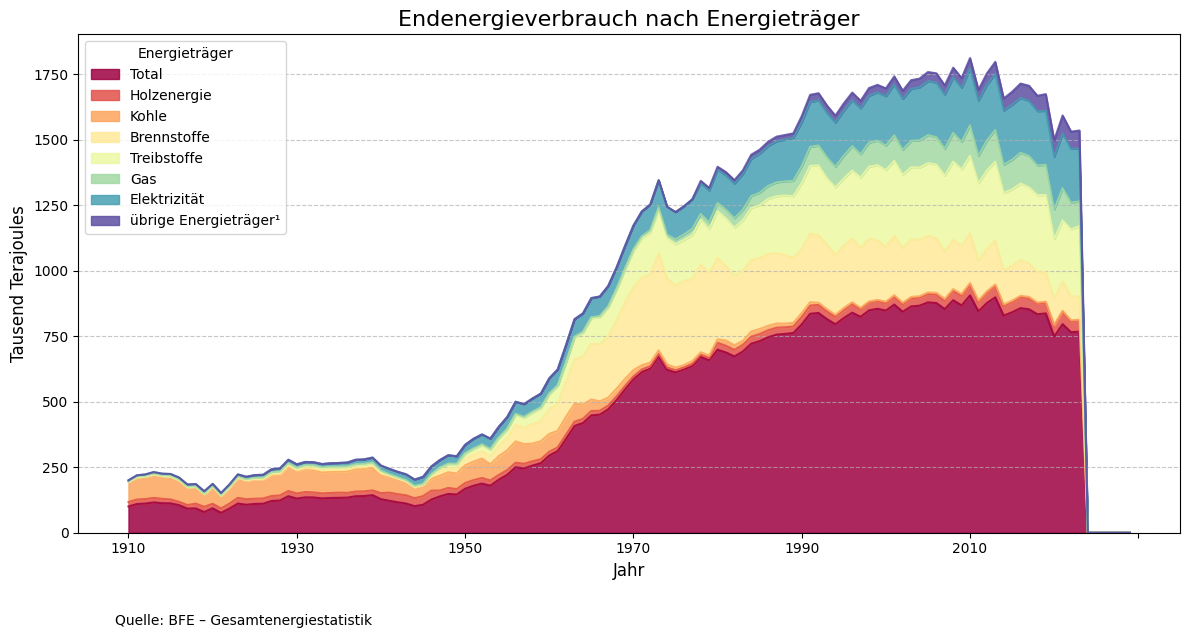

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors


# Read the CSV file
df = pd.read_csv('../Daten/cleaned_energy_data_fixed.csv', encoding='ISO-8859-1')

df.columns = df.columns.str.encode('latin1').str.decode('utf-8')
# Debug: Print column names
print(df.columns)

# Use the correct column name for setting the index
df.set_index("Year", inplace=True) 

# Plot the data
fig, ax = plt.subplots(figsize=(12, 6))
df.plot(kind='area', stacked=True, cmap='Spectral', alpha=0.85, ax=ax)

cursor = mplcursors.cursor(ax, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(
    f"Jahr: {sel.target[0]:.0f}\nWert: {sel.target[1]:.2f}")
)

# Customize the plot
plt.title('Endenergieverbrauch nach Energieträger', fontsize=16)
plt.ylabel('Tausend Terajoules', fontsize=12)
plt.xlabel('Jahr', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Energieträger', loc='upper left', fontsize=10)

# Add source note
plt.figtext(0.1, -0.05, 'Quelle: BFE – Gesamtenergiestatistik', fontsize=10, ha='left')

# Display the plot
plt.tight_layout()
plt.show()
